In [1]:
from models import *
import pandas as pd


data_processor = DataProcessor('AKBNK.E.csv')
data_processor.data.head()

,network_time,bist_time,msg_type,asset_name,side,price,que_loc,qty,order_id
0,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,1,6000,7621969089428617284
1,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,2,100,7621969089428723717
2,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,3,10,7621969089428724890
3,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,4,5000,7621969089428940862
4,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.80,5,1,7621969089428616329


In [2]:
#reading the sample lob
lob_sample=pd.read_csv("sample_lob.txt")
#looping through the data to construct the order book for each network time stemp

lob_sample['Mold Package']=lob_sample['Mold Package'].str.split(';')
lob_sample=lob_sample.explode('Mold Package')
lob_sample.loc[50:55]

,Date,Asset,bid3qty,bid3px,bid2qty,bid2px,bid1qty,bid1px,ask1px,ask1qty,ask2px,ask2qty,ask3px,ask3qty,Mold Package
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-650-7621969089428696828
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-2500-7621969089428699020
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-5001-7621969089428703893
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-410-7621969089428722131
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-100-7621969089428724303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2022-09-21 09:55:26.246317312,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.06-48-7621969089428972439
55,2022-09-21 10:00:00.091279872,AKBNK,6673.0,11.77,10.0,11.78,51822.0,11.80,11.82,168998.0,11.83,158335.0,11.84,150705.0,E-B-11.81-6000-7621969089428617284
55,2022-09-21 10:00:00.091279872,AKBNK,6673.0,11.77,10.0,11.78,51822.0,11.80,11.82,168998.0,11.83,158335.0,11.84,150705.0,E-B-11.81-100-7621969089428723717
55,2022-09-21 10:00:00.091279872,AKBNK,6673.0,11.77,10.0,11.78,51822.0,11.80,11.82,168998.0,11.83,158335.0,11.84,150705.0,E-B-11.81-10-7621969089428724890


In [3]:
import timeit
start_time = timeit.default_timer()

#creating df's for linit order book and executions
lob_snaps, execs = data_processor.lob_dfs()

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")



Elapsed time: 28.423241200999996 seconds


In [4]:
lob_snaps.head()

,Asset,bid1qty,bid1px,bid2qty,bid2px,bid3qty,bid3px,ask1px,ask1qty,ask2px,ask2qty,ask3px,ask3qty,Mold Package
Date,,,,,,,,,,,,,,
2022-09-21 09:55:26.244327990+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
2022-09-21 09:55:26.244354755+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
2022-09-21 09:55:26.244382524+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
2022-09-21 09:55:26.244411606+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
2022-09-21 09:55:26.244439791+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...


In [5]:
lob_snaps.tail()

,Asset,bid1qty,bid1px,bid2qty,bid2px,bid3qty,bid3px,ask1px,ask1qty,ask2px,ask2qty,ask3px,ask3qty,Mold Package
Date,,,,,,,,,,,,,,
2022-09-21 18:10:00.150434673+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.00,23471,13.01,79793,13.02,1679,A-S-13.0-200-7621969089454528602;A-S-13.0-100-...
2022-09-21 18:10:00.150455947+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.05,409082,13.06,257784,0.00,0,A-S-13.05-1000-7621969089428653434;A-S-13.05-1...
2022-09-21 18:10:00.150477707+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.06,225065,0.00,0,0.00,0,A-S-13.06-250-7621969089428671388;A-S-13.06-18...
2022-09-21 18:10:00.150494443+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.06,119184,0.00,0,0.00,0,A-S-13.06-30-7621969089456714933;A-S-13.06-500...
2022-09-21 18:10:00.150547262+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,0.00,0,0.00,0,0.00,0,


In [6]:
execs.head()

,execpx,execqty
2022-09-21 10:00:00.091279766+03:00,11.81,5000
2022-09-21 10:00:00.106780169+03:00,11.80,1611
2022-09-21 10:00:00.119995765+03:00,11.80,1200
2022-09-21 10:00:00.121344635+03:00,11.80,8800
2022-09-21 10:00:00.125455159+03:00,11.80,1200


In [7]:
execs.tail()

,execpx,execqty
2022-09-21 18:08:43.808620603+03:00,11.52,10000
2022-09-21 18:08:46.553009344+03:00,11.52,1000
2022-09-21 18:08:48.515232861+03:00,11.52,600
2022-09-21 18:08:52.977619405+03:00,11.52,10000
2022-09-21 18:09:16.463262101+03:00,11.52,3000


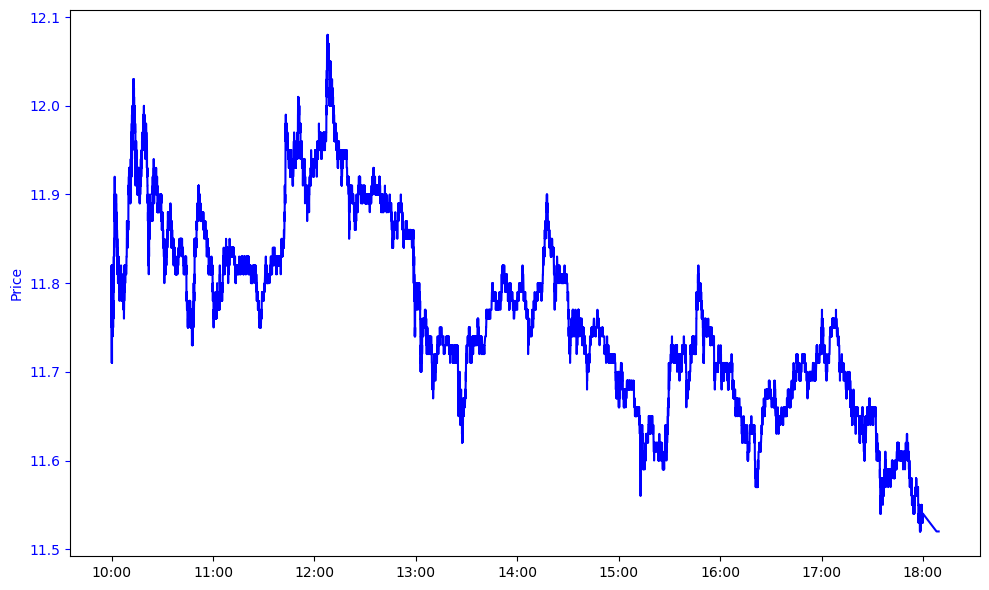

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set matplotlib's timezone
plt.rcParams['timezone'] = 'Europe/Istanbul'

# Ensure that the index is a datetime object
execs.index = pd.to_datetime(execs.index)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(execs.index, execs['execpx'], color='b', label='Price')
ax1.set_ylabel('Price', color='b')
ax1.tick_params('y', colors='b')

# Format x-axis to show hours and minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()


In [9]:
execs.describe()

,execpx,execqty
count,26554.000000,26554.000000
mean,11.787865,2660.158507
std,0.121582,7224.529678
min,11.520000,1.000000
25%,11.700000,50.000000
50%,11.780000,500.000000
75%,11.880000,2262.000000
max,12.080000,197847.000000


In [10]:
execs['volsum_big']=execs['execqty'].rolling('120S').sum()
execs['pxvolsum12']=(execs['execpx']*execs['execqty']).rolling('120S').sum()
execs['vwap120S']=execs['pxvolsum120S']/execs['volsum120S']
execs.head()

,execpx,execqty,volsum120S,pxvolsum120S,vwap120S
2022-09-21 10:00:00.091279766+03:00,11.81,5000,5000.0,59050.0,11.810000
2022-09-21 10:00:00.106780169+03:00,11.80,1611,6611.0,78059.8,11.807563
2022-09-21 10:00:00.119995765+03:00,11.80,1200,7811.0,92219.8,11.806401
2022-09-21 10:00:00.121344635+03:00,11.80,8800,16611.0,196059.8,11.803010
2022-09-21 10:00:00.125455159+03:00,11.80,1200,17811.0,210219.8,11.802807


In [11]:
execs['volsum600S']=execs['execqty'].rolling('600S').sum()
execs['pxvolsum600S']=(execs['execpx']*execs['execqty']).rolling('600S').sum()
execs['vwap600S']=execs['pxvolsum600S']/execs['volsum600S']
execs.head()

,execpx,execqty,volsum120S,pxvolsum120S,vwap120S,volsum600S,pxvolsum600S,vwap600S
2022-09-21 10:00:00.091279766+03:00,11.81,5000,5000.0,59050.0,11.810000,5000.0,59050.0,11.810000
2022-09-21 10:00:00.106780169+03:00,11.80,1611,6611.0,78059.8,11.807563,6611.0,78059.8,11.807563
2022-09-21 10:00:00.119995765+03:00,11.80,1200,7811.0,92219.8,11.806401,7811.0,92219.8,11.806401
2022-09-21 10:00:00.121344635+03:00,11.80,8800,16611.0,196059.8,11.803010,16611.0,196059.8,11.803010
2022-09-21 10:00:00.125455159+03:00,11.80,1200,17811.0,210219.8,11.802807,17811.0,210219.8,11.802807


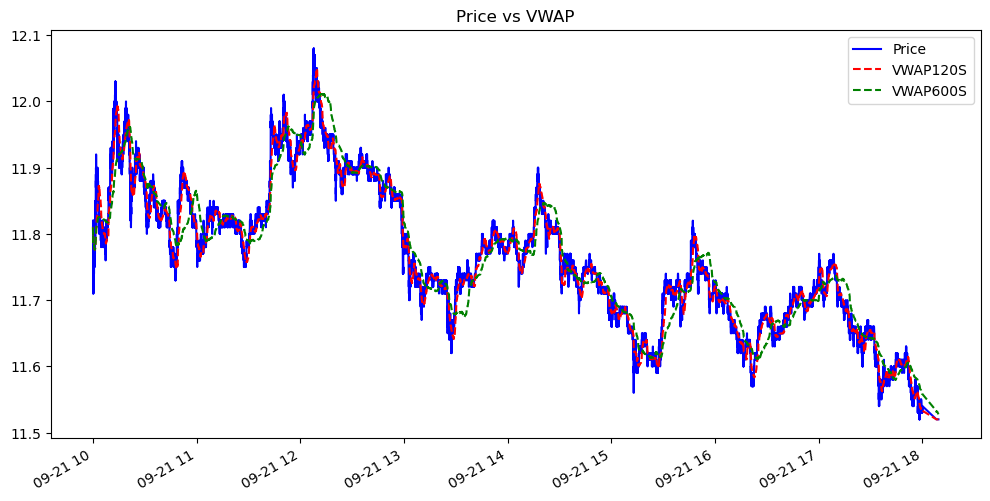

In [12]:
# Drop unnecessary columns
#execs.drop(columns=['pxvolsum120S', 'volsum'], inplace=True)


plt.figure(figsize=(12, 6))
execs['execpx'].plot(label='Price', color='blue')
execs['vwap120S'].plot(label='VWAP120S', color='red', linestyle='--')
execs['vwap600S'].plot(label='VWAP600S', color='green', linestyle='--')
plt.title('Price vs VWAP')
plt.legend()
plt.show()


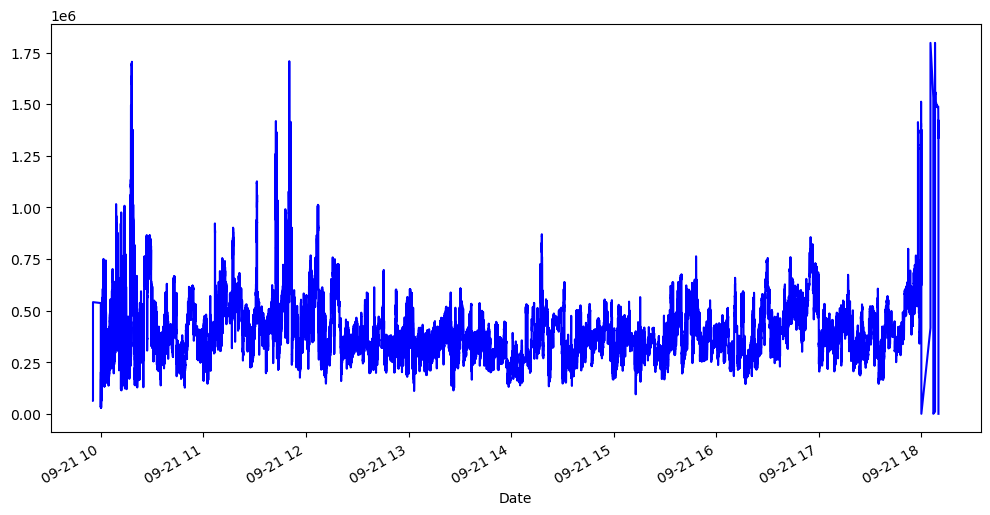

In [13]:
lob_snaps['total_volume']=(lob_snaps['ask1qty']+lob_snaps['ask2qty']+lob_snaps['ask3qty']
                           +lob_snaps['bid1qty']+lob_snaps['bid2qty']+lob_snaps['bid3qty'])
plt.figure(figsize=(12, 6))
lob_snaps['total_volume'].plot(label='volume', color='blue')
plt.show()

In [14]:
lob_snaps['buyers_volume']=lob_snaps['bid1qty']+lob_snaps['bid2qty']+lob_snaps['bid3qty']
lob_snaps['sellers_volume']=lob_snaps['ask1qty']+lob_snaps['ask2qty']+lob_snaps['ask3qty']
lob_snaps['volume_delta']=lob_snaps['buyers_volume']-lob_snaps['sellers_volume']

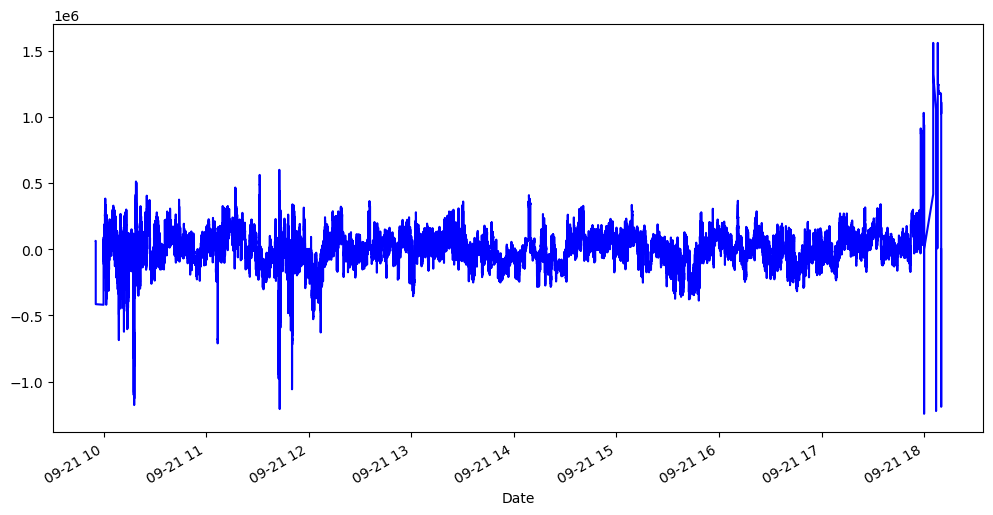

In [15]:
plt.figure(figsize=(12, 6))
lob_snaps['volume_delta'].plot(label='volume delta', color='blue')
plt.show()

In [16]:
lob_snaps['volume_delta_avg']=lob_snaps['volume_delta'].rolling('1200S').mean()
lob_snaps['volume_delta_std']=lob_snaps['volume_delta'].rolling('1200S').std()

<AxesSubplot:xlabel='Date'>

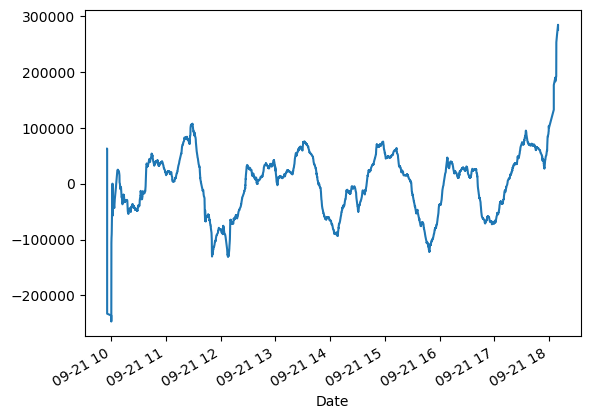

In [17]:
lob_snaps['volume_delta_avg'].plot()